<center> 
    <h1>Python Flask - a micro framework webserver</h1>
        <tt>
            <b>Quickstarter Guide by <a href="https://github.com/abhimanyus1997" alt="abhimanyus1997">Abhimanyu Singh</a>
            </b>
        </tt>  
    <hr>    
</center>
<img src="https://flask.palletsprojects.com/en/2.1.x/_images/flask-logo.png" alt="Flask Logo" style="display: block; margin-left: auto; margin-right: auto; width: 50%; width:20%">


* Flask is based on WSGI (web server gateway interface) toolkit and jinja2 template engine
* Requires python 2.7+
* To install use 
    * `pip install flask`
    * `conda install flask`


## Simple Flask Server
Run to on the browser at **http://localhost:80**

``` Python
from flask import Flask  
  
app = Flask(__name__) #creating the Flask class object   
 
@app.route('/') #decorator drfines the   
def home():  
    return "hello, this is our first flask website";  
  
if __name__ =='__main__':  
    app.run(port=80,debug = True)  

```

### app.route():
 The route() function of the Flask class defines the URL mapping of the associated function. The syntax is given below.
`app.route(rule, options)`

* **rule**:  represents URL binding with the function.
* **options**: a list of parameters to be forwarded to the underlying Rule

### app.run():
The run() method of the Flask class is used to run the flask application on the local development server.  
`app.run(host, port = 5000, debug, options)`

#### Tips and Tricks:
* Set `host=0.0.0.0` to make it availabe externally
* Set `debug=True` so that the server will then reload itself if the code changes.


# Flask App Routing

App routing is used to map the specific URL with the associated function that is intended to perform some task  

### Example 1: 
In our first application, the URL ('/') is associated with the home function that returns a particular string displayed on the web page.

```Python
from flask import Flask  
app = Flask(__name__)  
 
@app.route('/home')  
def home():  
    return "hello, welcome to our website";  
  
if __name__ =="__main__":  
    app.run(debug = True)  
```

## Variable Rules -  in app routing rules
It is possible to build a URL dynamically, by adding variable parts to the rule parameter.  
  
This variable part is marked as <variable-name>. It is passed as a keyword argument to the function with which the rule is associated.

#### Example 1 : Simple Variable Rule Routing

```Python
from flask import Flask  
app = Flask(__name__)  
 
@app.route('/hello/<name>')
def hello_name(name):
    x = "Hello "+str(name)
    return x
  
if __name__ =="__main__":  
    app.run(debug = True)  
```

#### Types of inputs
* str : Default 
* int : accepts integer
* float : For floating point value
* path : accepts slashes used as directory separator character
  
  

#### Example - 2 : Multiple Input Type Variable Rule Routing

```Python
from flask import Flask
app = Flask(__name__)

@app.route('/blog/<int:postID>')
def show_blog(postID):
   return 'Blog Number %d' % postID

@app.route('/rev/<float:revNo>')
def revision(revNo):
   return 'Revision Number %f' % revNo

if __name__ == '__main__':
   app.run()
```

### add_url_rule() - Another Approach

One more approach to perform routing for the flask web application  
`add_url_rule(<url rule>, <endpoint>, <view function>)`

**This function is mainly used in the case if the view function is not given and we need to connect a view function to an endpoint externally by using this function.**

#### Example - 3: Using add_url_rule()

```Python
from flask import Flask  
app = Flask(__name__)  
  
def about():  
    return "This is about page";  
  
app.add_url_rule("/about","about",about)  
  
if __name__ =="__main__":  
    app.run(debug = True)  
```

# HTML Escaping


When returning HTML (the default response type in Flask), any user-provided values rendered in the output must be escaped **to protect from injection attacks**. HTML templates rendered with Jinja, introduced later, will do this automatically.

```Python
from markupsafe import escape

@app.route("/<name>")
def hello(name):
    return f"Hello, {escape(name)}!"
```

# Flask URL Building

The `url_for()` function is very useful for dynamically building a URL for a specific function. The function accepts the name of a function as first argument, and one or more keyword arguments, each corresponding to the variable part of URL.

`flask.url_for(endpoint, **values)`
*Generates a URL to the given endpoint with the method provided.*

#### Example 1 - url_for() function
```Python
from flask import Flask, redirect, url_for
app = Flask(__name__)

@app.route('/admin')
def hello_admin():
   return 'Hello Admin'

@app.route('/guest/<guest>')
def hello_guest(guest):
   return 'Hello %s as Guest' % guest

@app.route('/user/<name>')
def hello_user(name):
   if name =='admin':
      return redirect(url_for('hello_admin'))
   else:
      return redirect(url_for('hello_guest',guest = name))

if __name__ == '__main__':
   app.run(debug = True)

```

**Benefits of the Dynamic URL Building**
1. It avoids hard coding of the URLs.
1. We can change the URLs dynamically instead of remembering the manually changed hard-coded URLs.
1. URL building handles the escaping of special characters and Unicode data transparently.
1. The generated paths are always absolute, avoiding unexpected behavior of relative paths in browsers.
1. If your application is placed outside the URL root, for example, in /myapplication instead of /, `url_for()` properly handles that for you.

# Flask HTTP methods

| Method | Description |
| ------ | ----------- |
| GET | It is the most common method which can be used to send data in the unencrypted form to the server. |
| HEAD | It is similar to the GET but used without the response body. |
| POST | It is used to send the form data to the server. The server does not cache the data transmitted using the post method. |
| PUT | It is used to replace all the current representation of the target resource with the uploaded content. |
| DELETE | It is used to delete all the current representation of the target resource specified in the URL. |


## POST Method
Data sent to the server is **not shown** in the URL on the browser in the POST requests.

### Example - 1: POST Method

#### login.html

``` HTML
<html>  
   <body>  
      <form action = "http://localhost:5000/login" method = "post">  
         <table>  
        <tr><td>Name</td>  
        <td><input type ="text" name ="uname"></td></tr>  
        <tr><td>Password</td>  
        <td><input type ="password" name ="pass"></td></tr>  
        <tr><td><input type = "submit"></td></tr>  
    </table>  
      </form>  
   </body>  
</html>  
```

#### post_example.py

```Python
from flask import Flask, url_for, request
app = Flask(__name__)  
  
@app.route('/login',methods = ['POST'])  
def login():  
      uname=request.form['uname']  
      passwrd=request.form['pass']  
      if uname=="ayush" and passwrd=="google":  
          return "Welcome %s" %uname  
   
if __name__ == '__main__':  
   app.run(debug = True)  
```

## GET Method

Only thing chnages is <code>**request.args.get(**<i>name-attribute-in-form</i>**)**</code>
```Python
@app.route('/login',methods = ['GET'])  
def login():  
      uname=request.args.get('uname')  
      passwrd=request.args.get('pass')  
      if uname=="ayush" and passwrd=="google":  
          return "Welcome %s" %uname   
``` 

# Flask Templates


Return the response in the form of HTML templates

#### Example - 1: External File for template

```Python
from flask import *  
app = Flask(__name__)  
 
@app.route('/')  
def message():  
      return render_template('message.html')  
if __name__ == '__main__':  
   app.run(debug = True)  
```

##### NOTE: The Application Directory 
* script.py
* templates
* message.html

### Flask Templates - Delimiters

**The jinga2 template engine provides the following delimiters to escape from the HTML.**

* `{% ... %}` for statements
* `{{ ... }}` for expressions to print to the template output
* `{# ... #}` for the comments that are not included in the template output
* `# ... ##`  for line statements

#### Example 2- Using Delimiters

**message.html**
```HTML
<html>  
    <head>  
        <title>Messa/ge</title>  
    </head>  
    <body>  
        <h1>hi, {{ name }}</h1>  
    </body>  
</html> 
```

**script.py**
```Python
from flask import *  
app = Flask(__name__)  
  
@app.route('/user/<uname>')  
def message(uname):  
      return render_template('message.html',name=uname)  
if __name__ == '__main__':  
   app.run(debug = True)  
```

#### Example 3- Using Delimiters to Embeed Python in HTMl

**script.py**

```Python
from flask import *  
app = Flask(__name__)  
  
@app.route('/table/<int:num>')  
def table(num):  
      return render_template('print-table.html',n=num)  
if __name__ == '__main__':  
   app.run(debug = True)  

```

**print-table.py**
```HTML
<html>  
    <head>  
        <title>print table</title>  
    </head>  
    <body>  
        <h2> printing table of {{n}}</h2>
        {% for i  in range(1,11): %}  
            <h3>{{n}} X {{i}} = {{n * i}} </h3>  
        {% endfor %}  
    </body>  
</html>  
```

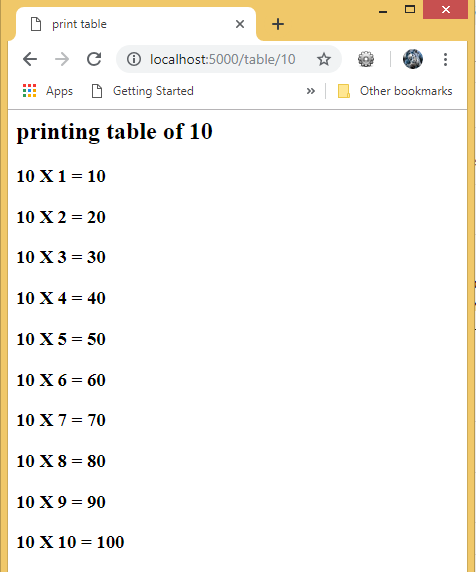

### Referring Static files in HTML


The static files such as CSS or JavaScript file enhance the display of an HTML web page.  
A web server is configured to serve such files from the static folder in the package or the next to the module.  
The static files are available at the path `/static` of the application.



**script.py**
```Python
from flask import *  
app = Flask(__name__)  
 
@app.route('/')  
def message():  
      return render_template('message.html')  
if __name__ == '__main__':  
   app.run(debug = True)  

```

**message.html**
```HTML
<html>  
<head>  
    <title>Message</title>  
    <link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}">  
</head>  
   
<body>  
    <h1>hi, welcome to the website</h1>  
</body>  
</html>  
```

**style.css**
```CSS
body {  
  background-color: powderblue;  
}  
h1 {  
  color: blue;  
}  
p {  
  color: red;  
}  
```